# RCA Case 2 - Uber


---
### Problem Statement :
---

Uber has received some complaints from their customers facing problems related to ride cancellations by the driver and non-availability of cars for a specific route in the city.

The uneven supply-demand gap for cabs from City to Airport and vice-versa is causing a bad effect on customer relationships as well as Uber is losing out on its revenue.

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to tackle the situation.

---

Define ride cancellation rate = $\frac{No.~of~cancelled~bookings}{No.~of~confirmed~bookings}$

Categorise the ride cancellations into two groups -
  1. Intercity
  2. City to Airport (or vice-versa)

---

First of all, irrespective of the data that we have, there are some questions that we need to ask as a Data/Product Analyst to get some clarity on the issue.

---

#### *Questions that we can ask :*

    Q. Is this thing happening for specific devices? (Android or iOS)

    Q. Has there been any major change/upgrade in the product?

    Q. Is this increase in cancellation rate gradual or sudden?

    Q. Have we checked for any issues on the driver app?

    Q. Are we receiving any major complaints or bug reports?

    Q. Is the change observed across several regions specifically or is it uniform?

    Q. Are we seeing a high cancellation rate for driver’s belonging to a specific age group?

    Q. Any pattern in ride cancellations in terms of the vehicle category? (Auto, Mini or Sedan)

    Q. Has there been any major holiday in the past week?

    Q. Have we done any recent experiments related to the platform?

    Q. Has there been any recent strike or protest by the drivers?

    Q. Has Uber been involved in any controversy lately?

    Q. Are we currently facing any connectivity related issues throughout the region?

    Q. Do we have any reports of frequent app crashes or something like that?

    Q. Is there any change detected in the usual user behavior over the last week?

    Q. Is it possible that the drivers might be using some other ride sharing platforms as well?

---

#### *Things that we'll be looking at :*

    - Frequency of booking requests getting cancelled each hour.

    - Pickup & Destination of the cancelled booking requests.

    - Days of week in which the cancellation rate is maximum.

    - Time of day during which the cancellation rate is at peak.

    - Time of day when the demand is highest and supply is low.

    - Time of day when the cabs are available but demand is low.

---

In [10]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/Desktop/SCALER-20240901T061051Z-001/SCALER/MODULE 8 Product Analytics/05_RCA-2(Uber)/uber-data.csv',dayfirst=True,na_values ='NA')

In [31]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [13]:
#object describe
df.describe(include='object')

,Pickup point,Status,Request timestamp,Drop timestamp
count,6745,6745,6745,2831
unique,2,3,5618,2598
top,City,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,3507,2831,6,4


In [15]:
df['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [17]:
df['Request id'].nunique()

6745

In [21]:
df.groupby(['Status']).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp
Status,,,,,
Cancelled,1264,1264,1264,1264,0
No Cars Available,2650,2650,0,2650,0
Trip Completed,2831,2831,2831,2831,2831


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
df.isna().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


In [33]:
#shape of dataset
print("No of rows: {}".format(df.shape[0]))
print("No of columns: {}".format(df.shape[1]))

No of rows: 6745
No of columns: 6


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [48]:
# Convert Request timestamp column to datetime dtype
df['Request_timestamp_1'] = pd.to_datetime(df['Request timestamp'],format = '%d-%m-%Y %H:%M:%S',errors = 'coerce')
df['Request_timestamp_2'] =  pd.to_datetime(df['Request timestamp'],format = '%d/%m/%Y %H:%M',errors = 'coerce')

In [64]:
df['Request timestamp'] =  df['Request_timestamp_2'].combine_first(df['Request_timestamp_1'])

In [51]:
# Convert drop timestamp column to datetime dtype
df['Drop_timestamp_1'] = pd.to_datetime(df['Drop timestamp'],format = '%d-%m-%Y %H:%M:%S',errors = 'coerce')
df['Drop_timestamp_2'] = pd.to_datetime(df['Drop timestamp'],format = '%d/%m/%Y %H:%M',errors = 'coerce')
df['Drop timestamp']= df['Drop_timestamp_1'].combine_first(df['Drop_timestamp_2'])

In [63]:
df.drop(columns =['Request_timestamp'],inplace = True)

In [67]:
df.drop(columns =['Request_timestamp_1','Request_timestamp_2','Drop_timestamp_1','Drop_timestamp_2'],inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [71]:
# Checking for null values -
(df.isnull().sum()/len(df))*100


,0
Request id,0.000000
Pickup point,0.000000
Driver id,39.288362
Status,0.000000
Request timestamp,0.000000
Drop timestamp,58.028169


In [73]:
print("No of Duplicate rows" ,df.duplicated().sum())

No of Duplicate rows 0


*Extracting new features from the existing ones -*

In [75]:
df['Request_hour'] = df['Request timestamp'].dt.hour

In [76]:
df['Time_slot'] = df['Request_hour'].apply(lambda x: "Dawn" if x <=4 else ("Early Morning" if x <=9 else ("Noon" if x <= 16 else ("Late Evening" if x<=21 else "Night"))))

In [77]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,Night


In [78]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand -

df['Cab_availability'] = df['Status'].apply(lambda x: 'Available' if x == 'Trip Completed' else 'Not Available')

In [81]:
df['Cab_availability'].value_counts(normalize = True)*100

,proportion
Cab_availability,
Not Available,58.028169
Available,41.971831


In [82]:
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Time_slot,Cab_availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Available


**Q. What is the Frequency of Requests that get Canceled or show ‘No Cars Available’ in each hour?**

In [87]:
df.groupby(['Request_hour'])['Status'].value_counts()

Request_hour  Status           
0             No Cars Available     56
              Trip Completed        40
              Cancelled              3
1             No Cars Available     56
              Trip Completed        25
                                  ... 
22            No Cars Available    138
              Cancelled             12
23            Trip Completed       103
              No Cars Available     81
              Cancelled             10
Name: count, Length: 72, dtype: int64

<Axes: xlabel='Request_hour', ylabel='count'>

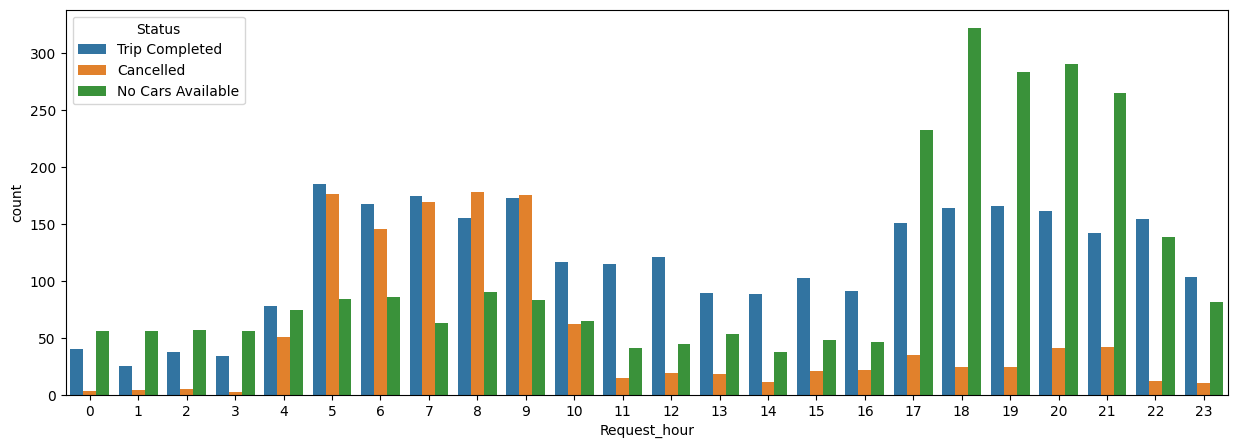

In [93]:
plt.figure(figsize = (15,5))
sns.countplot(x =df['Request_hour'],data = df,hue ='Status')

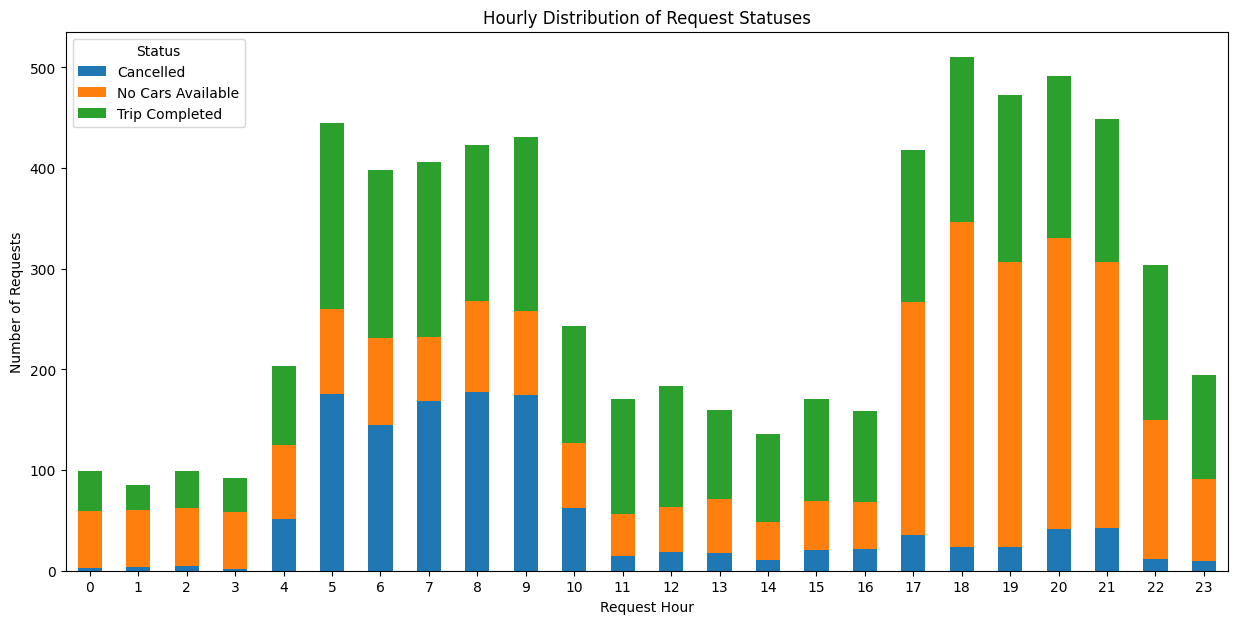

In [104]:
df.groupby(['Request_hour', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Hourly Distribution of Request Statuses')
plt.xlabel('Request Hour')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.show()

<Axes: >

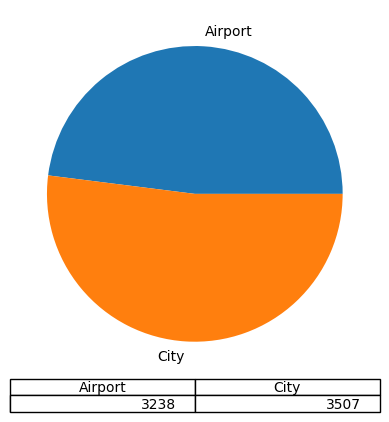

In [103]:
# Type of request
df.groupby(['Pickup point']).size().plot(kind ='pie',stacked = True,table = True)

<Axes: >

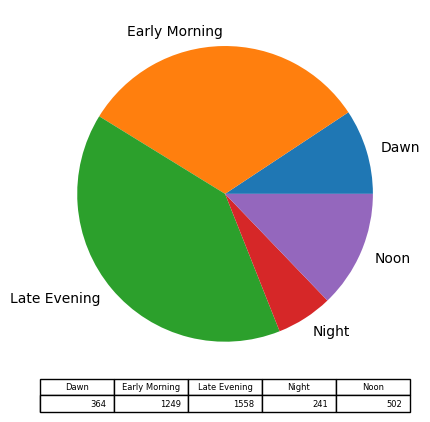

In [107]:
# Distribution of time slots
df[df['Cab_availability'] == 'Not Available'].groupby('Time_slot').size().plot(kind ='pie',stacked = True,table = True)

**Observation:** <br>
*Late Evenings* and *Early Mornings* are not recommended for Airport-City transport or vice versa.

**Q. Plot the Demand-Supply Gap from Airport to City.**

Text(0.5, 1.0, 'Demand-Supply Gap from Airport to City')

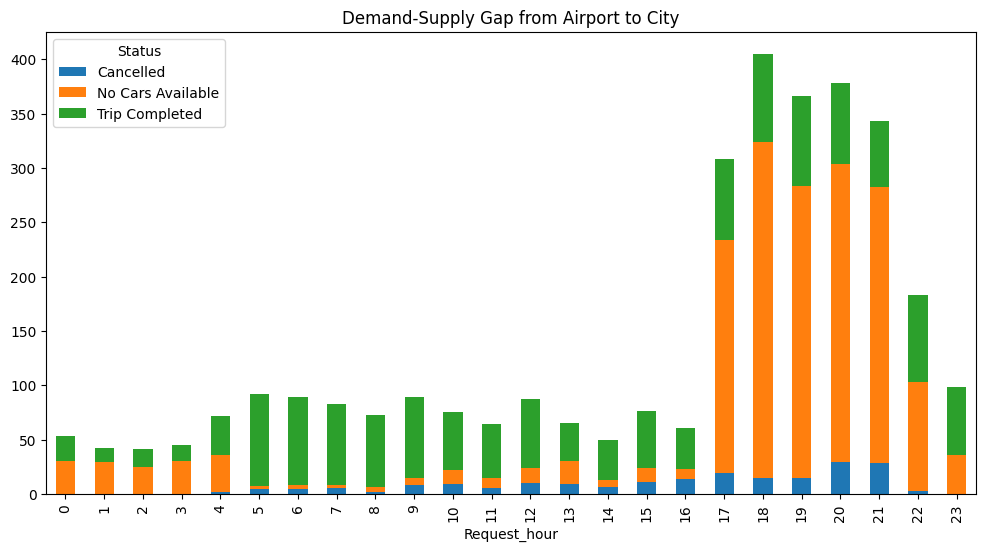

In [117]:
df[df['Pickup point'] == 'Airport'].groupby(['Request_hour','Status']).size().unstack().plot(kind ='bar',stacked = True,figsize =  (12, 6))
#.size() will give count
plt.title('Demand-Supply Gap from Airport to City')

**Observation:**
- *There is very high demand for cabs from Airport to City between 5:00 PM – 9:00 PM*
- *But the supply is very less due primarily due to ‘No Cabs Available'*

**Q. Plot the Demand-Supply Gap from City to Airport.**

Text(0.5, 1.0, 'Demand-Supply Gap from City to Airport')

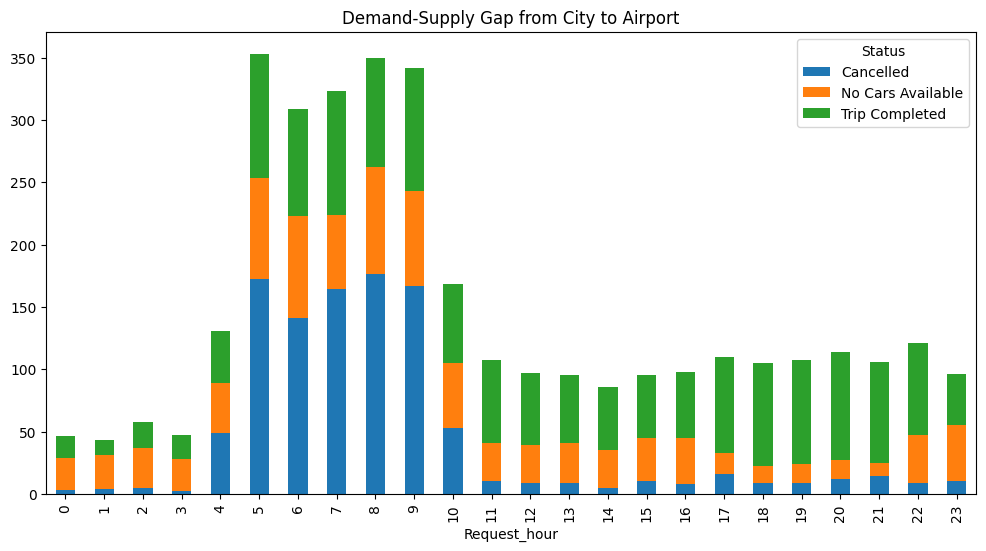

In [116]:
# Demand-Supply Gap from City to Airport -

df[(df['Pickup point']=="City")].groupby(['Request_hour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Demand-Supply Gap from City to Airport')

**Observation:**
- *There is very high demand for cabs from City to Airport between 5:00 AM – 9:00 AM*
- *But the supply is very less primarily due to Ride Cancellations*

**Q. What are the Time Slots where the highest gap exists?**

Text(0.5, 1.0, 'Time slots where highest gap exists')

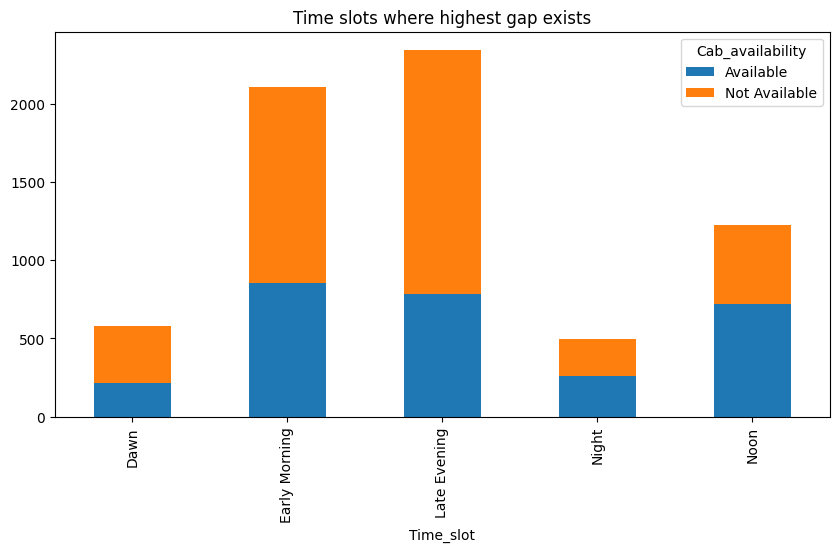

In [121]:
df.groupby(['Time_slot','Cab_availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 5))
plt.title('Time slots where highest gap exists')

**Observation:** </br>
- *Among the assumed time slots, we can see that the Late
Evening and Early Morning time slots has got the
highest gap.*
- *This means that during evening & morning hours the probability of
getting a cab is very less.*

Text(0.5, 1.0, 'Time slots where highest gap exists request from airport')

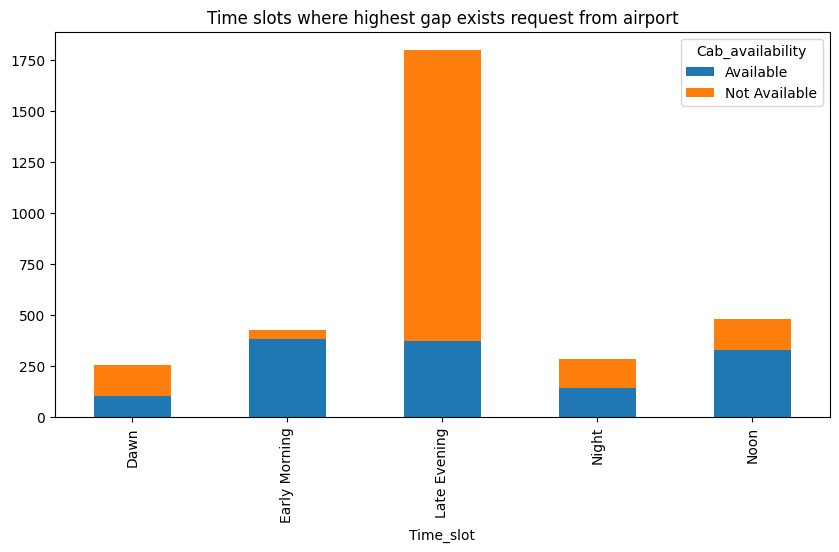

In [122]:
df[df['Pickup point'] == 'Airport'].groupby(['Time_slot','Cab_availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 5))
plt.title('Time slots where highest gap exists request from airport')

Text(0.5, 1.0, 'Time slots where highest gap exists request from city')

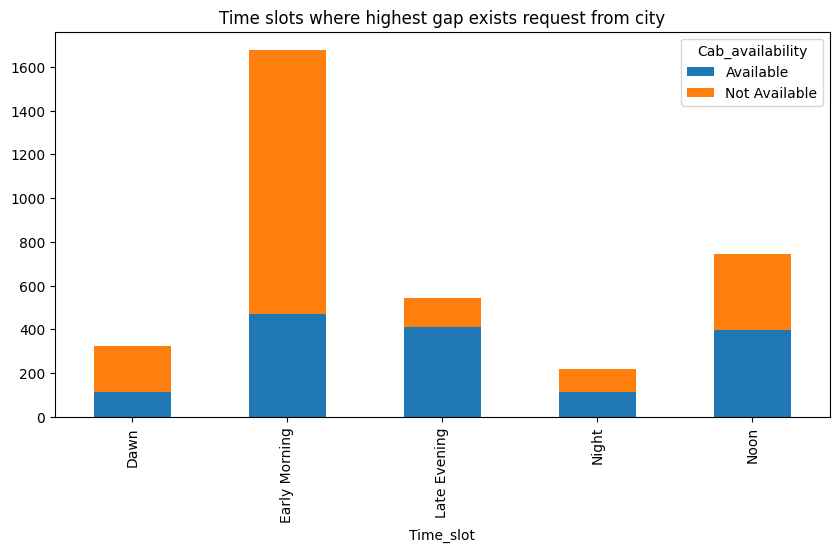

In [124]:
df[df['Pickup point'] == 'City'].groupby(['Time_slot','Cab_availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 5))
plt.title('Time slots where highest gap exists request from city')

Text(0, 0.5, '')

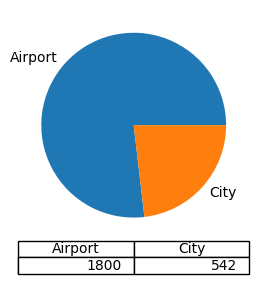

In [130]:
#  Types of Requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots -
df[df["Time_slot"]=="Late Evening"].groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(3,3), table=True)
plt.ylabel("")


Text(0, 0.5, '')

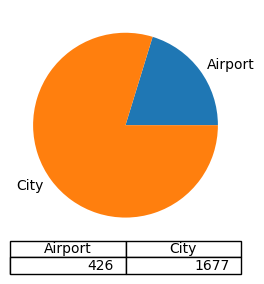

In [129]:
df[df["Time_slot"]=="Early Morning"].groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(3, 3), table=True)
plt.ylabel("")

## Insights

**Key Reasons for the Supply-Demand Gap:**

*   **Late Evening Shortage at the Airport:**
    *   During the late evening hours (roughly 5 PM to 9 PM), there's a high number of people at the Airport needing rides to the City.
    *   However, there aren't enough Uber drivers available at the Airport during this time to pick them up. This is seen in the high count of "No Cars Available" requests originating from the Airport in the evenings.

*   **Early Morning Cancellations from the City:**
    *   In the early morning hours (roughly 5 AM to 9 AM), many people in the City are requesting rides to the Airport.
    *   The problem here is not necessarily a lack of initial cars, but a high rate of trips being "Cancelled". This suggests that drivers who are in the City may be declining or cancelling trips that are going to the Airport during this busy morning period.

In short,  drivers aren't where the demand is highest, or they are actively avoiding certain routes during peak times. The incentives we discussed below are aimed at making those specific times and locations more attractive for drivers to help bridge these gaps.

## Recommendation


Here are some ideas for how Uber could encourage drivers to help out when and where we need them most:

**For getting more drivers at the Airport in the evening:**

1.  **Pay them more for airport pickups:** Just give drivers a bigger cut or a bonus for picking people up at the airport when it's busy in the evening. Make it worth their while to be there.
2.  **Promise them decent money for airport trips:** Let drivers know they'll make at least a certain amount for an airport ride in the evening, so they're not worried about getting a really cheap fare.
3.  **Give them a little extra to drive to the airport:** Even if they don't have a passenger, maybe pay drivers a small bonus just for going to the airport during those busy evening hours to increase the number of cars waiting.
4.  **Make the airport waiting area better:** Tidy up the waiting spot at the airport and make it more comfortable for drivers so they don't mind waiting for a ride.

**For getting drivers to take people to the Airport in the morning:**

1.  **Give them a bonus for airport drop-offs:** Pay drivers a bonus specifically for finishing a trip at the airport in the morning.
2.  **Help them get a ride back from the airport:** Make it easier for drivers who just dropped someone off at the airport to quickly get a new passenger heading back to the city. This way, they don't have to drive back empty.
3.  **Charge riders a bit more for early airport trips:** If riders are willing to pay a little extra for those early morning airport rides, drivers will be more likely to take them.

**Simple things for both times:**

4.  **Reward drivers who do lots of airport trips:** Create a simple rewards program where drivers earn more if they do a lot of those airport trips during the busy times.
5.  **Just tell drivers where the demand is:** Clearly show drivers in the app that there are lots of people needing rides at the airport in the evening and from the city to the airport in the morning, so they know where they can make good money.
6.  **Thank and reward loyal drivers:** Recognize and reward the drivers who regularly help cover those busy airport times.

These are just ways to make those specific trips more appealing to drivers so we can get more cars where and when people need them.